In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def plot_image(image):
    plt.imshow(image, cmap='gray')  
    plt.axis('off') 
    plt.show()
    print(image.shape)

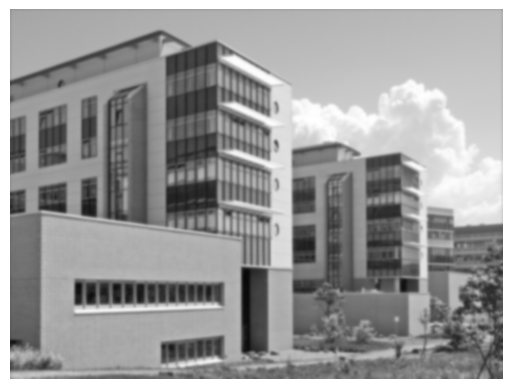

(600, 800, 3)


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

"GAUSSIAN FILTER FOR NOISE REDUCTION, sigma = variance. high sigma = high blour"
def gaussian_noise_reduction(image_path, sigma, path=None):
    image = cv2.imread(image_path)
    blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)
    if path != None:
        cv2.imwrite(path, blurred_image)

    return blurred_image

image_path_input = "./powerpoint/north_campus_grey.jpg"
image_path_output = "notrhcampusblur.jpg"

plot_image(gaussian_noise_reduction(image_path_input,2, image_path_output))

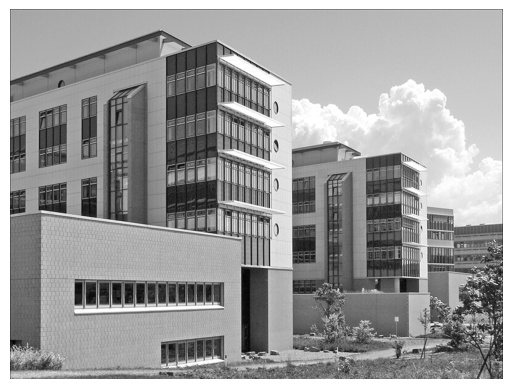

(600, 800)


In [7]:
def convert_to_black_and_white(image_path, save_path=""):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("file path incorrect")
    
    image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    if save_path:
        cv2.imwrite(save_path, image_bw)

    return image_bw

input_file_path = "./powerpoint/north_campus.jpg"

plot_image(convert_to_black_and_white(input_file_path))

In [8]:
def plot_image(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')  
    plt.show()
    print(image.shape)

In [10]:
"""
==========================
SOBEL FILTER
==========================
"""

import cv2
import numpy as np

def apply_sobel_filters(image_path):

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        raise ValueError(f"Unable to read image from path: {image_path}")
    
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    horizontal_sobel = cv2.convertScaleAbs(sobel_x)
    
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    vertical_sobel = cv2.convertScaleAbs(sobel_y)
    
    sobel_x_squared = np.square(sobel_x)
    sobel_y_squared = np.square(sobel_y)
    gradient_magnitude = np.sqrt(sobel_x_squared + sobel_y_squared)
    
    combined_sobel = cv2.normalize(gradient_magnitude, None, 0, 255, 
                                   cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    
    return vertical_sobel, horizontal_sobel, combined_sobel

def save_sobel_images(image_path, output_prefix='sobel'):

    vertical, horizontal, combined = apply_sobel_filters(image_path)
    
    cv2.imwrite(f'{output_prefix}_vertical.jpg', vertical)
    cv2.imwrite(f'{output_prefix}_horizontal.jpg', horizontal)
    cv2.imwrite(f'{output_prefix}_combined.jpg', combined)


input_image_path = "./powerpoint/north_campus_blurred.jpg"

save_sobel_images(input_image_path)

In [12]:
"""
=======================================
SOBEL FILTER SAMPLE APPLICATION
=======================================
"""

def apply_sobel_filter(matrix, direction='horizontal'):

    matrix = np.array(matrix)
    
    sobel_horizontal = np.array([
        [ 1,  2,  1],
        [ 0,  0,  0],
        [-1, -2, -1]
    ])
    
    sobel_vertical = np.array([
        [ 1,  0, -1],
        [ 2,  0, -2],
        [ 1,  0, -1]
    ])
    
    kernel = sobel_horizontal if direction == 'horizontal' else sobel_vertical
    
    rows, cols = matrix.shape
    
    output = np.zeros_like(matrix, dtype=float)
    
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            sub_matrix = matrix[i-1:i+2, j-1:j+2]
            
            conv_value = np.sum(sub_matrix * kernel)
            
            output[i, j] = conv_value
    
    return output

if __name__ == "__main__":
    # Matrice di esempio
    matrix = np.array([
        [100, 100, 100, 200, 200, 200],
        [100, 100, 100, 200, 200, 200],
        [100, 100, 100, 200, 200, 200],
        [100, 100, 100, 200, 200, 200],
        [100, 100, 100, 200, 200, 200],
        [100, 100, 100, 200, 200, 200],

    ])

    
    horizontal_result = apply_sobel_filter(matrix, 'horizontal')
    print("HORIZONTAL SOBEL FILTER:")
    print(horizontal_result)
    
    vertical_result = apply_sobel_filter(matrix, 'vertical')
    print("\nVERTICAL SOBEL FILTER:")
    print(vertical_result)

HORIZONTAL SOBEL FILTER:
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

VERTICAL SOBEL FILTER:
[[   0.    0.    0.    0.    0.    0.]
 [   0.    0. -400. -400.    0.    0.]
 [   0.    0. -400. -400.    0.    0.]
 [   0.    0. -400. -400.    0.    0.]
 [   0.    0. -400. -400.    0.    0.]
 [   0.    0.    0.    0.    0.    0.]]


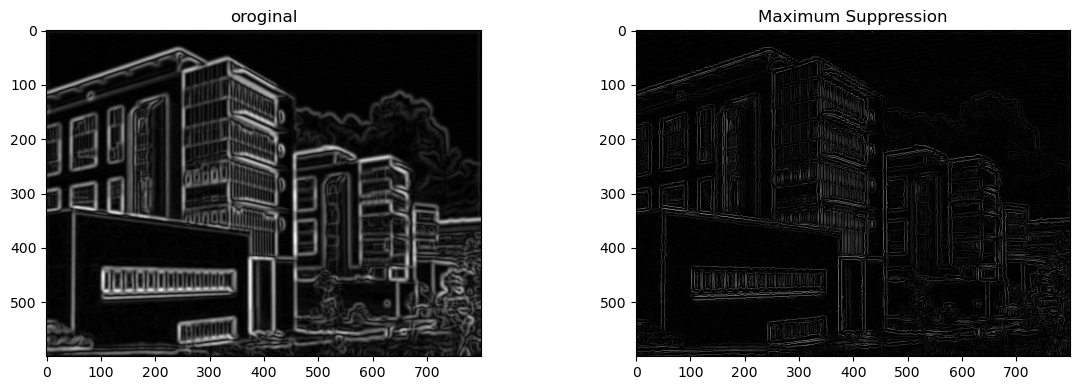

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def canny_maximum_suppression(image_path):

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    gx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    gy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    
    magnitude = np.sqrt(gx**2 + gy**2)
    direction = np.arctan2(gy, gx)
    direction = (np.rad2deg(direction) + 180) % 180  # Convert to 0-180 degrees
    
    magnitude = magnitude / magnitude.max() * 255
    
    suppressed = np.zeros_like(image, dtype=np.float64)
    height, width = image.shape
    
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            angle = direction[y, x]
            
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                before = magnitude[y, x-1]
                after = magnitude[y, x+1]
            elif (22.5 <= angle < 67.5):
                before = magnitude[y+1, x-1]
                after = magnitude[y-1, x+1]
            elif (67.5 <= angle < 112.5):
                before = magnitude[y-1, x]
                after = magnitude[y+1, x]
            elif (112.5 <= angle < 157.5):
                before = magnitude[y-1, x-1]
                after = magnitude[y+1, x+1]
            else:
                continue
            
            if magnitude[y, x] >= before and magnitude[y, x] >= after:
                suppressed[y, x] = magnitude[y, x]
    
    suppressed = suppressed / suppressed.max() * 255
    suppressed = suppressed.astype(np.uint8)
    
    output_path = 'maximum_suppression_output.png'
    cv2.imwrite(output_path, suppressed)
    
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.title('oroginal')
    plt.imshow(image, cmap='gray')
    plt.subplot(122)
    plt.title('Maximum Suppression')
    plt.imshow(suppressed, cmap='gray')
    plt.tight_layout()
    plt.show()
    
    return suppressed


image_path = 'sobel_combined.jpg'
result = canny_maximum_suppression(image_path)


In [20]:
import cv2
import numpy as np
from collections import deque

def canny_double_thresholding(image_path, low_threshold_ratio=0.05, high_threshold_ratio=0.15):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        raise ValueError(f"UNABLE TO REACH IMAGE PATH: {image_path}")
    
    max_intensity = np.max(image)
    low_threshold = int(max_intensity * low_threshold_ratio)
    high_threshold = int(max_intensity * high_threshold_ratio)
    
    edge_image = np.zeros_like(image, dtype=np.uint8)
    visited = np.zeros_like(image, dtype=bool)
    
    def is_strong_edge(pixel_value):
        return pixel_value >= high_threshold
    
    def is_weak_edge(pixel_value):
        return low_threshold <= pixel_value < high_threshold
    
    strong_edges = []
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if is_strong_edge(image[x, y]):
                edge_image[x, y] = 255
                strong_edges.append((x, y))
    
    directions = [(dx, dy) for dx in [-1, 0, 1] for dy in [-1, 0, 1] if dx != 0 or dy != 0]
    
    for strong_x, strong_y in strong_edges:
        if visited[strong_x, strong_y]:
            continue
            
        queue = deque([(strong_x, strong_y)])
        
        while queue:
            x, y = queue.popleft()
            
            if visited[x, y]:
                continue
                
            visited[x, y] = True
            
            for dx, dy in directions:
                new_x, new_y = x + dx, y + dy
                
                if (new_x < 0 or new_x >= image.shape[0] or 
                    new_y < 0 or new_y >= image.shape[1] or 
                    visited[new_x, new_y]):
                    continue
                
                if is_weak_edge(image[new_x, new_y]):
                    edge_image[new_x, new_y] = 255
                    queue.append((new_x, new_y))
    
    return edge_image

def save_edges(image_path, output_path=None, low_ratio=0.05, high_ratio=0.15):
    edge_image = canny_double_thresholding(image_path, 
                                         low_threshold_ratio=low_ratio, 
                                         high_threshold_ratio=high_ratio)
    
    if output_path is None:
        base_path = image_path.rsplit('.', 1)[0]
        ext = image_path.rsplit('.', 1)[1]
        output_path = f"{base_path}_canny.{ext}"
    
    cv2.imwrite(output_path, edge_image)
    return output_path

input_image_path = './powerpoint/north_campus_blurred.jpg'
output_path = save_edges(
    input_image_path, 
    low_ratio=0.15,   
    high_ratio=0.50   
)
output_path = "./fnrf/roi_reshaped_canny_edge.jpg"
print(f"image saved in: {output_path}")

image saved in: ./fnrf/roi_reshaped_canny_edge.jpg


Accumulator Values: Min=0.0, Max=1340.0
Image shape: (756, 1766)
Value: 0.0, Count: 468749
Value: 1.0, Count: 572
Value: 2.0, Count: 25149
Value: 3.0, Count: 15207
Value: 4.0, Count: 50782
Value: 5.0, Count: 18463
Value: 6.0, Count: 44072
Value: 7.0, Count: 18808
Value: 8.0, Count: 16025
Value: 9.0, Count: 8968
Total non-zero: 222811


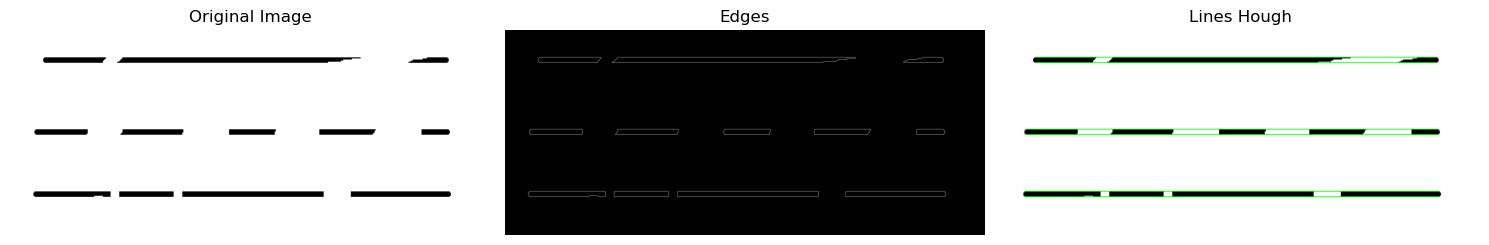

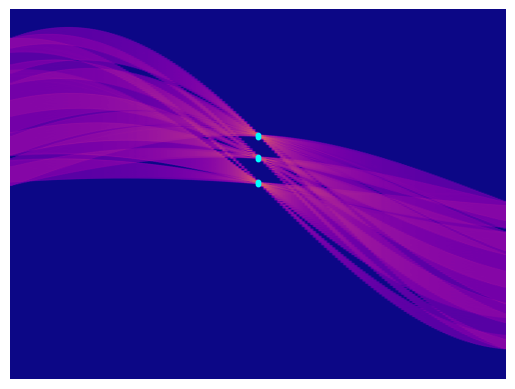

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import seaborn as sns

def hough_edge_detection(image_path):

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    
    edges = cv2.Canny(blurred, 50, 150)
    
    # Hough transform parameters
    rho = 1  # Distance resolution in pixels
    theta = np.pi / 180  # Angular resolution in radians
    threshold = 70  # Minimum number of intersections
    min_line_length = 50  # Minimum line length
    max_line_gap = 1000  # Maximum allowed gap between line segments
    
    lines = cv2.HoughLinesP(edges, rho, theta, threshold, 
                           minLineLength=min_line_length, 
                           maxLineGap=max_line_gap)
    
    hough_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(hough_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    diag_len = int(np.sqrt(image.shape[0]**2 + image.shape[1]**2))
    
    accumulator = np.zeros((2 * diag_len, 180), dtype=np.float32)
    
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            if edges[y, x] > 0:
                for theta_idx in range(180):
                    theta_rad = theta_idx * np.pi / 180
                    rho_val = int(x * np.cos(theta_rad) + y * np.sin(theta_rad)) + diag_len
                    accumulator[rho_val, theta_idx] += 1
                    
    print(f"Accumulator Values: Min={accumulator.min()}, Max={accumulator.max()}")
    print(f"Image shape: {image.shape}")
    
    unique, counts = np.unique(accumulator, return_counts=True)
    for val, count in zip(unique[:10], counts[:10]):  # Print first 10 unique values
        print(f"Value: {val}, Count: {count}")
    print(f"Total non-zero: {np.sum(accumulator > 0)}")    
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(131)
    plt.title('Original Image')
    plt.axis("off")
    plt.imshow(image, cmap='gray')
    
    plt.subplot(132)
    plt.title('Edges')
    plt.axis("off")
    plt.imshow(edges, cmap='gray')
    
    plt.subplot(133)
    plt.title('Lines Hough')
    plt.axis("off")
    plt.imshow(hough_image)
    
    plt.tight_layout()
    plt.savefig("hough_transformations.jpg")
    
    plt.figure()
    
    normalized_accumulator = np.log1p(accumulator - accumulator.min())
    normalized_accumulator /= normalized_accumulator.max() + 1e-9
    
    plt.imshow(normalized_accumulator, cmap='plasma', aspect='auto',
               extent=(-90, 90, -diag_len, diag_len), origin='lower')
    
    threshold = 0.8  
    y_idxs, x_idxs = np.where(normalized_accumulator > threshold)
    for x, y in zip(x_idxs, y_idxs):
        plt.scatter(x - 90, y - diag_len, color='cyan', s=10)  
    plt.axis("off")
    plt.savefig("hough_accumulator.jpg")
    plt.show()
    
    return hough_image, accumulator

image_path = "lane_hough_example.png"

hough_result, accumulator = hough_edge_detection(image_path)
plt.show()

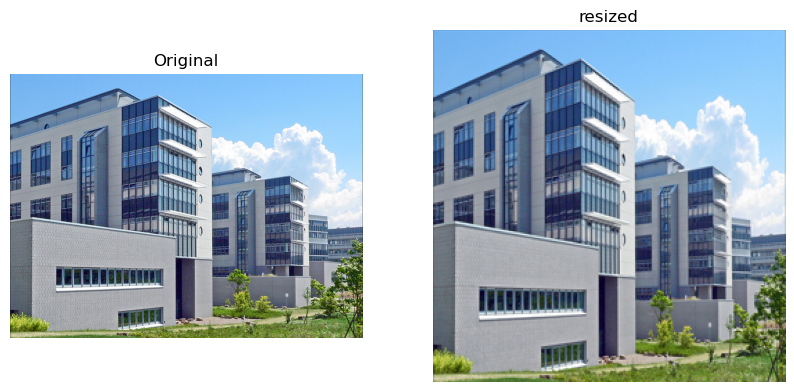

output path: ./fnrf/roi_reshaped.jpg


In [32]:
from PIL import Image
import matplotlib.pyplot as plt

def resize_and_save_image(input_path, output_path):

    try:
        original_image = Image.open(input_path)
        
        resized_image = original_image.resize((255, 255))
        
        if resized_image.mode == "RGBA" or resized_image.mode == "P":
            resized_image = resized_image.convert("RGB")
        
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        plt.title("Original")
        plt.imshow(original_image)
        plt.axis("off")
        
        plt.subplot(1, 2, 2)
        plt.title("resized")
        plt.imshow(resized_image)
        plt.axis("off")
        
        plt.show()
        
        resized_image.save(output_path)
        
        print(f"output path: {output_path}")
        return resized_image
    
    except Exception as e:
        print(f"error: {e}")

# Esempio di utilizzo
input_path = "./powerpoint/north_campus.jpg"
output_path = "./fnrf/roi_reshaped.jpg"

resized_image = resize_and_save_image(input_path, output_path)

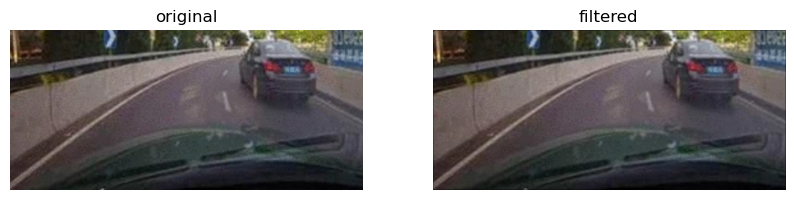

In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def fuzzy_noise_reduction(image_path, window_size=3):

    def fuzzy_weight(distance, sigma=0.5):
        return np.exp(- (distance ** 2) / (2 * sigma ** 2))
    
    img = cv2.imread(image_path)
    img = img.astype(np.float32) / 255.0  
    
    height, width, channels = img.shape
    filtered_img = np.zeros_like(img)
    
    offset = window_size // 2
    
    for y in range(offset, height - offset):
        for x in range(offset, width - offset):
            weight_sum = np.zeros(3)
            pixel_sum = np.zeros(3)
            
            for dy in range(-offset, offset + 1):
                for dx in range(-offset, offset + 1):
                    ny, nx = y + dy, x + dx
                    
                    RG_dist = np.abs(img[y, x, 0] - img[ny, nx, 1])
                    RB_dist = np.abs(img[y, x, 0] - img[ny, nx, 2])
                    GB_dist = np.abs(img[y, x, 1] - img[ny, nx, 2])
                    
                    red_weight = fuzzy_weight(RG_dist) * fuzzy_weight(RB_dist)
                    green_weight = fuzzy_weight(RG_dist) * fuzzy_weight(GB_dist)
                    blue_weight = fuzzy_weight(RB_dist) * fuzzy_weight(GB_dist)
                    
                    weight_sum[0] += red_weight
                    weight_sum[1] += green_weight
                    weight_sum[2] += blue_weight
                    
                    pixel_sum[0] += red_weight * img[ny, nx, 0]
                    pixel_sum[1] += green_weight * img[ny, nx, 1]
                    pixel_sum[2] += blue_weight * img[ny, nx, 2]
            
            filtered_img[y, x, 0] = pixel_sum[0] / weight_sum[0]
            filtered_img[y, x, 1] = pixel_sum[1] / weight_sum[1]
            filtered_img[y, x, 2] = pixel_sum[2] / weight_sum[2]
    
    return (filtered_img * 255).astype(np.uint8)

image_path = "./fnrf/ex3.png"
filtered_image = fuzzy_noise_reduction(image_path)

cv2.imwrite("./fnrf/ex3fnrf.png", filtered_image)

original_image = cv2.imread(image_path)

original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
filtered_image_rgb = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image_rgb)
plt.title("original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(filtered_image_rgb)
plt.title("filtered")
plt.axis("off")

plt.show()